# <font color='blue'> CARLOS WILSON GOMES DE BARROS MATRICULA: 1831133120</font>


##  Análise Exploratória de Dados

### Fonte: base de dados Kaggle

In [6]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style="white")
%matplotlib inline

In [7]:
# Importando dados
clean_data_path = "C:/Users/Carlinhos/Anaconda3/Library/arquivos/autos.csv"
df = pd.read_csv(clean_data_path,encoding="latin-1")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 313687 entries, 0 to 313686
Data columns (total 27 columns):
dateCrawled            313687 non-null object
name                   313687 non-null object
seller                 313687 non-null object
offerType              313687 non-null object
price                  313687 non-null int64
abtest                 313687 non-null object
vehicleType            313687 non-null object
yearOfRegistration     313687 non-null int64
gearbox                313687 non-null object
powerPS                313687 non-null int64
model                  313687 non-null object
kilometer              313687 non-null int64
monthOfRegistration    313687 non-null object
fuelType               313498 non-null object
brand                  313687 non-null object
notRepairedDamage      313687 non-null object
dateCreated            313687 non-null object
postalCode             313687 non-null int64
lastSeen               313687 non-null object
yearOfCreation      

In [8]:
# Vizualizar campos e dados de forma reduzida e resumida
print(df.head())

           dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat     Offer   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat     Offer   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat     Offer   
3  2016-03-17 16:54:04             GOLF_4_1_4__3TÃRER  privat     Offer   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat     Offer   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  \
0    480   test       Other                1993    manuell        0   
1  18300   test       coupe                2011    manuell      190   
2   9800   test         suv                2004  automatik      163   
3   1500   test  kleinwagen                2001    manuell       75   
4   3600   test  kleinwagen                2008    manuell       69   

     ...     postalCode             lastSeen yearOfCreation yearCrawled  \
0    ...          70435  2016-04-07 03:16

## Distribuição de Veículos com base no Ano de Registro

In [19]:
# Visualizar data frame
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-05 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÃRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
5,2016-04-04 17:36:23,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Offer,650,test,limousine,1995,manuell,102,...,33775,2016-04-06 19:17:07,2016,2016,April,April,2,19,21,2
6,2016-04-01 20:48:51,Peugeot_206_CC_110_Platinum,privat,Offer,2200,test,cabrio,2004,manuell,109,...,67112,2016-04-05 18:18:39,2016,2016,April,April,4,18,12,4
7,2016-03-21 18:54:38,VW_Derby_Bj_80__Scheunenfund,privat,Offer,0,test,limousine,1980,manuell,50,...,19348,2016-03-25 16:47:58,2016,2016,March,March,4,16,36,5
8,2016-03-17 10:53:50,VW_Golf_4_5_tuerig_zu_verkaufen_mit_Anhaengerk...,privat,Offer,999,test,kleinwagen,1998,manuell,101,...,27472,2016-03-31 17:17:06,2016,2016,March,March,14,17,18,11
9,2016-03-26 19:54:18,Mazda_3_1.6_Sport,privat,Offer,2000,control,limousine,2004,manuell,105,...,96224,2016-04-06 10:45:34,2016,2016,March,March,11,10,12,1


In [21]:
# Listar todas as colunas
list(df)

['dateCrawled',
 'name',
 'seller',
 'offerType',
 'price',
 'abtest',
 'vehicleType',
 'yearOfRegistration',
 'gearbox',
 'powerPS',
 'model',
 'kilometer',
 'monthOfRegistration',
 'fuelType',
 'brand',
 'notRepairedDamage',
 'dateCreated',
 'postalCode',
 'lastSeen',
 'yearOfCreation',
 'yearCrawled',
 'monthOfCreation',
 'monthCrawled',
 'NoOfDaysOnline',
 'NoOfHrsOnline',
 'yearsOld',
 'monthsOld']

In [20]:
# Printar as estatísticas de resumo
print(df.describe())

               price  yearOfRegistration        powerPS      kilometer  \
count  313687.000000       313687.000000  313687.000000  313687.000000   
mean     3902.961863         2001.909231     109.564250  131435.778340   
std      4168.150636            6.803211     191.741685   34963.149957   
min         0.000000         1910.000000       0.000000    5000.000000   
25%       999.000000         1998.000000      68.000000  125000.000000   
50%      2490.000000         2002.000000     104.000000  150000.000000   
75%      5400.000000         2006.000000     140.000000  150000.000000   
max     28800.000000         2016.000000   20000.000000  150000.000000   

          postalCode  yearOfCreation  yearCrawled  NoOfDaysOnline  \
count  313687.000000   313687.000000     313687.0   313687.000000   
mean    50349.563597     2015.999930       2016.0        8.543274   
std     25765.545682        0.008374          0.0        8.511917   
min      1067.000000     2015.000000       2016.0        

C:\Users\Carlinhos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


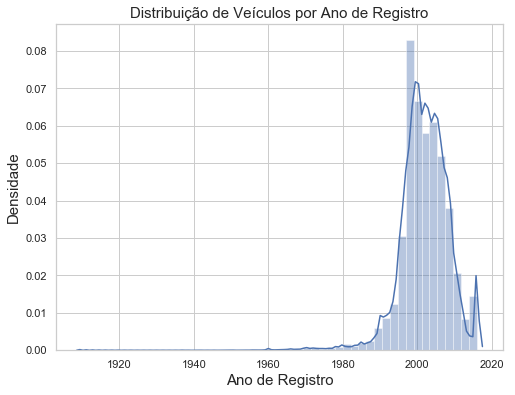

In [16]:
# Histograma com a Distribuição de Veículos por ano de Registro
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(df["yearOfRegistration"], kde=True, ax=ax)
ax.set_title('Distribuição de Veículos por Ano de Registro', fontsize= 15)
plt.ylabel("Densidade", fontsize= 15)
plt.xlabel("Ano de Registro", fontsize= 15)
plt.show()

In [ ]:
# Box Plot para observar a distribuição do preços por tipo de veículoa
sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Box Plot",fontsize=18,color="b",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço do Veículo",fontdict= {'size':14})
plt.show()

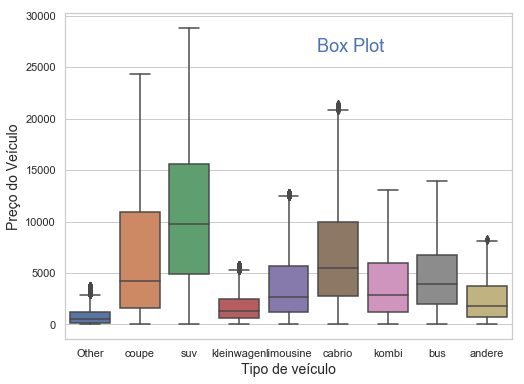

In [33]:
# Box Plot para observar a distribuição do preços por tipo de veículos

sns.set_style("whitegrid")
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x="vehicleType", y="price", data=df)
ax.text(5.25,27000,"Box Plot",fontsize=18,color="b",ha="center", va="center")
ax.xaxis.set_label_text("Tipo de veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Preço do Veículo",fontdict= {'size':14})
plt.show()

C:\Users\Carlinhos\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Carlinhos\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


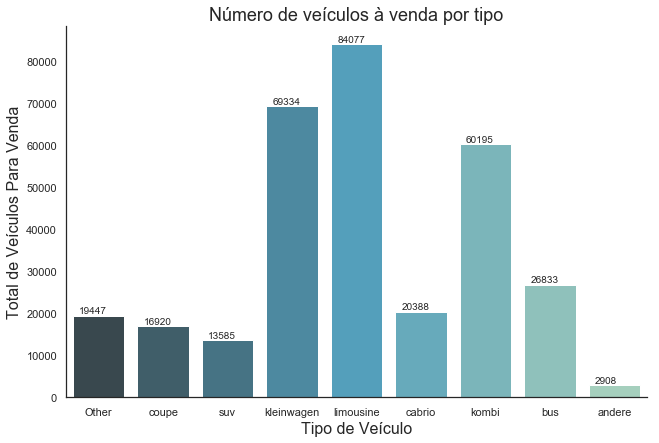

In [29]:
# Número de veículos à venda por tipo

sns.set_style("white")
g = sns.factorplot(x="vehicleType", data=df, kind="count", palette="GnBu_d", size=6, aspect=1.5)
g.ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Total de Veículos Para Venda", fontdict= {'size':16})
g.ax.set_title("Número de veículos à venda por tipo",fontdict= {'size':18})
for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+500))

C:\Users\Carlinhos\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\Carlinhos\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


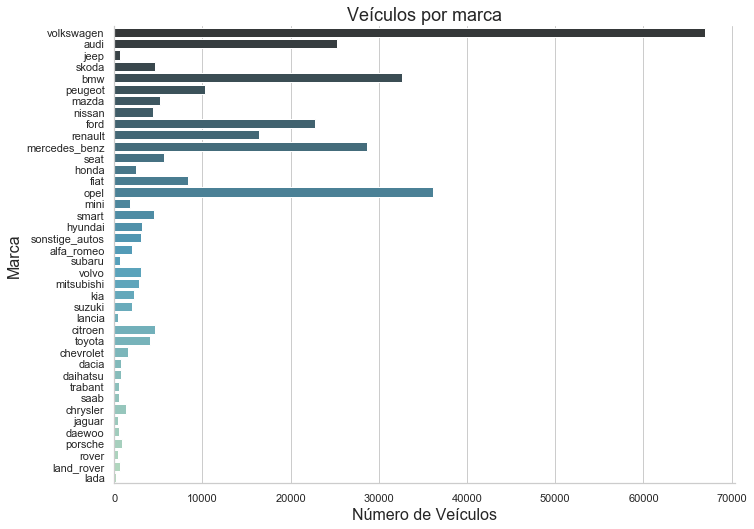

In [25]:
# Número de veículos por marca

sns.set_style("whitegrid")
g = sns.factorplot(y="brand", data=df, kind="count", palette="GnBu_d", size=7, aspect=1.5) #Reds_r
g.ax.set_title("Veículos por marca",fontdict={'size':18})
g.ax.xaxis.set_label_text("Número de Veículos",fontdict= {'size':16})
g.ax.yaxis.set_label_text("Marca",fontdict= {'size':16})
plt.show()

In [40]:
# Média de preço por marca e tipo de veículo

trial = pd.DataFrame()
for b in list(df["brand"].unique()):
    for v in list(df["vehicleType"].unique()):
        z = df[(df["brand"] == b) & (df["vehicleType"] == v)]["price"].mean()
        trial = trial.append(pd.DataFrame({'brand':b , 'vehicleType':v , 'avgPrice':z}, index=[0]))
trial = trial.reset_index()
del trial["index"]
trial["avgPrice"].fillna(0,inplace=True)
trial["avgPrice"].isnull().value_counts()
trial["avgPrice"] = trial["avgPrice"].astype(int)
trial.head(5)

print(trial)

          brand vehicleType  avgPrice
0    volkswagen       Other       897
1    volkswagen       coupe      8014
2    volkswagen         suv     13946
3    volkswagen  kleinwagen      1626
4    volkswagen   limousine      3743
5    volkswagen      cabrio      5784
6    volkswagen       kombi      3902
7    volkswagen         bus      5881
8    volkswagen      andere      2597
9          audi       Other      1012
10         audi       coupe     11242
11         audi         suv     18644
12         audi  kleinwagen      2582
13         audi   limousine      3829
14         audi      cabrio      9655
15         audi       kombi      5442
16         audi         bus      3485
17         audi      andere      2685
18         jeep       Other       960
19         jeep       coupe         0
20         jeep         suv      9082
21         jeep  kleinwagen         0
22         jeep   limousine         0
23         jeep      cabrio      1350
24         jeep       kombi         0
25         j

C:\Users\Carlinhos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


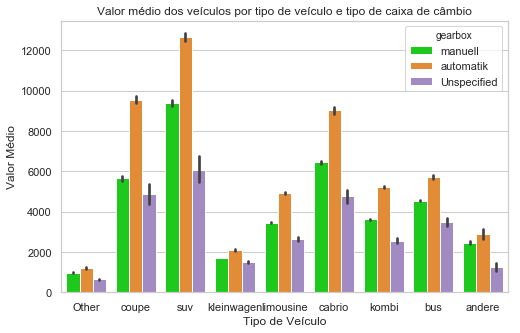

In [44]:
# Valor Médio do Veículo por tipo de câmbio

fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"] 
sns.barplot(x="vehicleType", y="price",hue="gearbox", palette=colors, data=df)
ax.set_title("Valor médio dos veículos por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':12})
ax.yaxis.set_label_text("Valor Médio",fontdict= {'size':12})
plt.show()

C:\Users\Carlinhos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


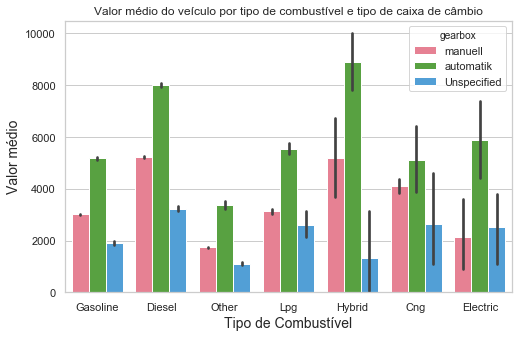

In [42]:
# Valor médio do veículo por tipo de combustível e tipo de caixa de câmbio

fig, ax = plt.subplots(figsize=(8,5))
colors = ["#00e600", "#ff8c1a","#a180cc"]
sns.barplot(x="fuelType", y="price",hue="gearbox", palette="husl",data=df)
ax.set_title("Valor médio do veículo por tipo de combustível e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Combustível",fontdict= {'size':14})
ax.yaxis.set_label_text("Valor médio",fontdict= {'size':14})
plt.show()

C:\Users\Carlinhos\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


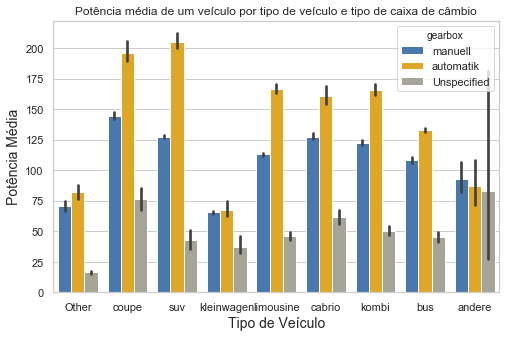

In [13]:
# Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio

colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
fig, ax = plt.subplots(figsize=(8,5))
sns.set_palette(sns.xkcd_palette(colors))
sns.barplot(x="vehicleType", y="powerPS",hue="gearbox",data=df)
ax.set_title("Potência média de um veículo por tipo de veículo e tipo de caixa de câmbio",fontdict= {'size':12})
ax.xaxis.set_label_text("Tipo de Veículo",fontdict= {'size':14})
ax.yaxis.set_label_text("Potência Média",fontdict= {'size':14})
plt.show()